# Sales Analysis

## 1. Retrieving Data

In [470]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [471]:
df = pd.read_excel("D:\Data Science\Projects\John project\Sales Analysis/1688639662_ausapparalsales4thqrt2020.xlsx")

In [472]:
df.head(20)

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500
5,2020-10-01,Afternoon,WA,Men,10,25000
6,2020-10-01,Afternoon,WA,Women,3,7500
7,2020-10-01,Afternoon,WA,Seniors,11,27500
8,2020-10-01,Evening,WA,Kids,15,37500
9,2020-10-01,Evening,WA,Men,15,37500


In [473]:
df.shape

(7560, 6)

In [474]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    7560 non-null   datetime64[ns]
 1   Time    7560 non-null   object        
 2   State   7560 non-null   object        
 3   Group   7560 non-null   object        
 4   Unit    7560 non-null   int64         
 5   Sales   7560 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 354.5+ KB


In [475]:
numerical_feature_columns = list(df._get_numeric_data().columns)
numerical_feature_columns
categorical_feature_columns = list(set(df.columns) - set(df._get_numeric_data().columns))
categorical_feature_columns

['Time', 'Group', 'State', 'Date']

### Observation - Retrieving Data

1. This dataset consists of 7560 rows with 6 columns
2. There are 2 columns with numerical data and three columns with Categorical data and one column with datetime

        Unit, sales - Discrete data (int datatype) 
        Time, State, Group - Continuous data (object data type)
        Date - datetime datatype

## 2. Data wrangling

### 2.1 Check for duplicates or unnecessary data

In [476]:
df[df.duplicated(keep='first')]

,Date,Time,State,Group,Unit,Sales


### 2.2 Check for Missing or incorrect Entries

In [477]:
df.isna()

,Date,Time,State,Group,Unit,Sales
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
7555,False,False,False,False,False,False
7556,False,False,False,False,False,False
7557,False,False,False,False,False,False
7558,False,False,False,False,False,False


In [478]:
df.notna()

,Date,Time,State,Group,Unit,Sales
0,True,True,True,True,True,True
1,True,True,True,True,True,True
2,True,True,True,True,True,True
3,True,True,True,True,True,True
4,True,True,True,True,True,True
...,...,...,...,...,...,...
7555,True,True,True,True,True,True
7556,True,True,True,True,True,True
7557,True,True,True,True,True,True
7558,True,True,True,True,True,True


In [479]:
df.isna().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

### Observation :

1. The dataset doesn't have any duplicate entries.
2. Also there is no Null values or Incorrect Values.

### 2.3 Normalization

In [480]:
numerical_colls = ['Unit']
scaler2 = MinMaxScaler()
df['Unit Normalization'] = scaler2.fit_transform(df[numerical_colls])

In [481]:
numerical_cols = ['Sales']
scaler1 = MinMaxScaler()
df['SalesNormalization'] = scaler1.fit_transform(df[numerical_cols])
df.head()

,Date,Time,State,Group,Unit,Sales,Unit Normalization,SalesNormalization
0,2020-10-01,Morning,WA,Kids,8,20000,0.095238,0.095238
1,2020-10-01,Morning,WA,Men,8,20000,0.095238,0.095238
2,2020-10-01,Morning,WA,Women,4,10000,0.031746,0.031746
3,2020-10-01,Morning,WA,Seniors,15,37500,0.206349,0.206349
4,2020-10-01,Afternoon,WA,Kids,3,7500,0.015873,0.015873


### 2.4 Applying Groupby() function for  data chunking or merging

### 2.4.1 Applying Groupby() for state column

In [482]:
df.groupby(['State']).mean()

,Unit,Sales,Unit Normalization,SalesNormalization
State,,,,
NSW,27.766667,69416.666667,0.408995,0.408995
NT,8.362963,20907.407407,0.100999,0.100999
QLD,12.376852,30942.129630,0.164712,0.164712
SA,21.799074,54497.685185,0.314271,0.314271
TAS,8.429630,21074.074074,0.102058,0.102058
VIC,39.098148,97745.370370,0.588859,0.588859
WA,8.204630,20511.574074,0.098486,0.098486


In [483]:
df.groupby(['State']).min()

,Date,Time,Group,Unit,Sales,Unit Normalization,SalesNormalization
State,,,,,,,
NSW,2020-10-01,Afternoon,Kids,12,30000,0.158730,0.158730
NT,2020-10-01,Afternoon,Kids,2,5000,0.000000,0.000000
QLD,2020-10-01,Afternoon,Kids,3,7500,0.015873,0.015873
SA,2020-10-01,Afternoon,Kids,10,25000,0.126984,0.126984
TAS,2020-10-01,Afternoon,Kids,2,5000,0.000000,0.000000
VIC,2020-10-01,Afternoon,Kids,20,50000,0.285714,0.285714
WA,2020-10-01,Afternoon,Kids,2,5000,0.000000,0.000000


### 2.4.2 State-wise Maximum Sales and Minimum Sales

In [551]:
comp = df.groupby('State')['Sales'].min()
comp_min=pd.DataFrame(comp)
comp_min.reset_index(inplace=True)
comp_min.rename(columns = {'Sales':'Minimum Sales'}, inplace = True)
comp_min

,State,Minimum Sales
0,NSW,30000
1,NT,5000
2,QLD,7500
3,SA,25000
4,TAS,5000
5,VIC,50000
6,WA,5000


In [552]:
comp = df.groupby(['State'])['Sales'].max()
comp_max=pd.DataFrame(comp)
comp_max.reset_index(inplace=True)
comp_max.rename(columns = {'Sales':'Maximum Sales'}, inplace = True)
comp_max

,State,Maximum Sales
0,NSW,112500
1,NT,37500
2,QLD,62500
3,SA,87500
4,TAS,37500
5,VIC,162500
6,WA,37500


In [553]:
comp = pd.merge(comp_min, comp_max, on='State', how='inner')
comp

,State,Minimum Sales,Maximum Sales
0,NSW,30000,112500
1,NT,5000,37500
2,QLD,7500,62500
3,SA,25000,87500
4,TAS,5000,37500
5,VIC,50000,162500
6,WA,5000,37500


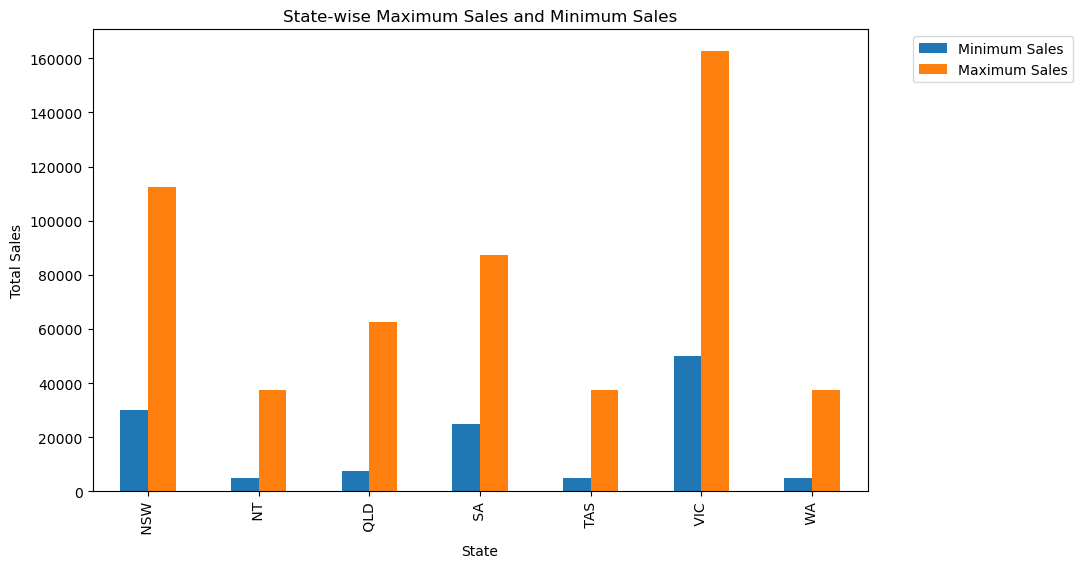

In [555]:
    comp.plot(kind='bar', x='State',stacked=False,figsize=(10,6))
    plt.title('State-wise Maximum Sales and Minimum Sales')
    plt.xlabel('State')
    plt.ylabel('Total Sales')
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

### Observation

The state-wise comparison of sales is performed and the following insights are observed:

    * The maximum sales is found in VIC state
    * The minimum sales is found in NT, TAS and WA

### 2.4.3 State-wise total sale analysis

In [489]:
state_sales = df.groupby('State')['Sales'].sum()
st = state_sales.reset_index()
st

,State,Sales
0,NSW,74970000
1,NT,22580000
2,QLD,33417500
3,SA,58857500
4,TAS,22760000
5,VIC,105565000
6,WA,22152500


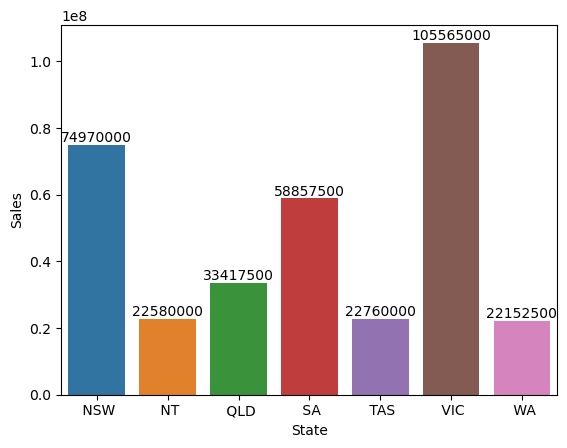

In [490]:
sns.barplot(x=st['State'], y=st['Sales'], data = st)

# Add data labels to each bar
for index, row in st.iterrows():
    plt.annotate(f'{row["Sales"]:.0f}', 
                 xy=(index, row["Sales"]), 
                 ha='center', 
                 va='bottom')

# Show the plot
plt.show()

### Observation:

Based on the total sales in each state, the highest total sale is found in VIC state and lowest total sale is found in WA state. The sequence based on highest to lowest total sales is as follows,

    1. VIC
    2. NSW
    3. SA
    4. QLD
    5. TAS
    6. NT
    7. WA

### 2.4.4 Applying Groupby() function for State and Time column

In [491]:
state_time_comp = df.groupby(['State','Time'])['Sales'].sum()
state_time_comp = pd.DataFrame(state_time_comp)
state_time_comp.reset_index(inplace=True)
state_time_comp

,State,Time,Sales
0,NSW,Afternoon,25110000
1,NSW,Evening,24712500
2,NSW,Morning,25147500
3,NT,Afternoon,7510000
4,NT,Evening,7627500
5,NT,Morning,7442500
6,QLD,Afternoon,11347500
7,QLD,Evening,10632500
8,QLD,Morning,11437500
9,SA,Afternoon,20025000


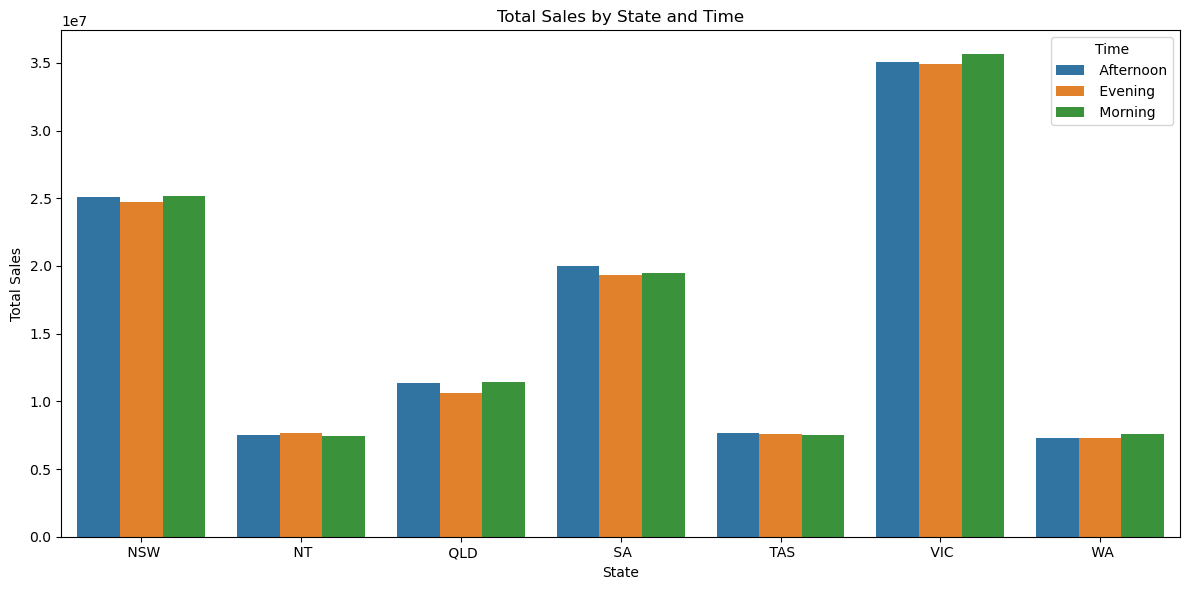

In [492]:
# Create the grouped bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='State', y='Sales', hue='Time', data=state_time_comp)

plt.title('Total Sales by State and Time')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.legend(title='Time')

#plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

### Observation:

Based on the grouping by of state column followed by Time column, it is observed that there are no much difference in the total sale based on Time of the sale. Moreover, it is found to be same.

### 2.4.5 Applying Groupby() function for state column and Group column

In [518]:
state_group_sales_max  = df.groupby(['State','Group'])['Sales'].max()
state_group_sales_max = pd.DataFrame(state_group_sales_max)
state_group_sales_max.reset_index(inplace=True)
state_group_sales_max

,State,Group,Sales
0,NSW,Kids,112500
1,NSW,Men,112500
2,NSW,Seniors,112500
3,NSW,Women,112500
4,NT,Kids,37500
5,NT,Men,37500
6,NT,Seniors,37500
7,NT,Women,37500
8,QLD,Kids,62500
9,QLD,Men,62500


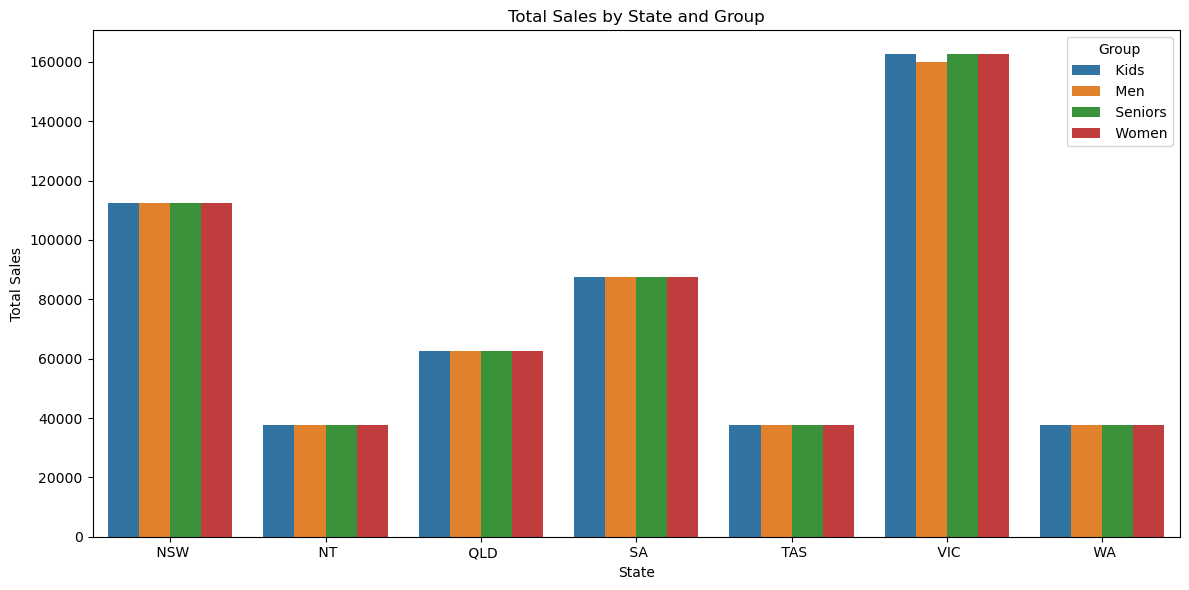

In [520]:
# Create the grouped bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='State', y='Sales', hue='Group', data=state_group_sales_max)

plt.title('Total Sales by State and Group')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.legend(title='Group')

#plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

### Observation:

Based on the grouping by of state column followed by Group column, it is observed that there are no much difference in the total sale based on Group of the sale. Moreover, it is found to be same.

### 2.4.6 Applying Groupby() function for Date column

In [497]:
time_of_day_sales = df.groupby('Date')['Sales'].sum()
time_of_day_sales

Date
2020-10-01    3720000
2020-10-02    3715000
2020-10-03    3890000
2020-10-04    3720000
2020-10-05    3862500
               ...   
2020-12-26    4715000
2020-12-27    4637500
2020-12-28    4595000
2020-12-29    4607500
2020-12-30    4590000
Name: Sales, Length: 90, dtype: int64

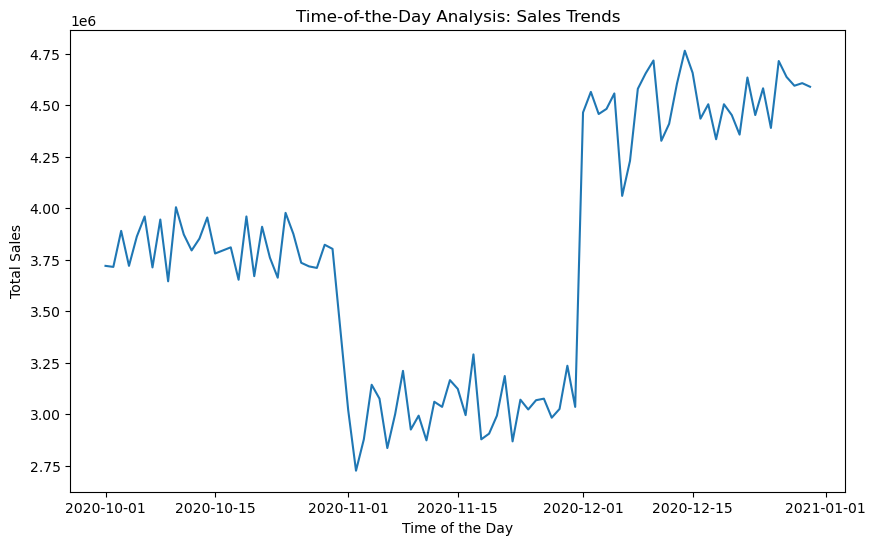

In [498]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=time_of_day_sales.index, y=time_of_day_sales.values)
plt.title('Time-of-the-Day Analysis: Sales Trends')
plt.xlabel('Time of the Day')
plt.ylabel('Total Sales')
plt.show()

### Observation:

1. From '2020-12-01' week, the total sales got drastically improved. 
2. From '2020-10-01' to '2020-11-01', the total sale is found to moderate.
3. From '2020-11-01' to '2020-12-01', the total sale is found to be decreased.

## 3. Data Analysis

### 3.1 Descriptive Statistics Analysis

In [499]:
df.describe()

,Unit,Sales,Unit Normalization,SalesNormalization
count,7560.000000,7560.000000,7560.000000,7560.000000
mean,18.005423,45013.558201,0.254054,0.254054
std,12.901403,32253.506944,0.204784,0.204784
min,2.000000,5000.000000,0.000000,0.000000
25%,8.000000,20000.000000,0.095238,0.095238
50%,14.000000,35000.000000,0.190476,0.190476
75%,26.000000,65000.000000,0.380952,0.380952
max,65.000000,162500.000000,1.000000,1.000000


In [500]:
descriptive_stats = df[['Sales','Unit']].describe()

In [501]:
descriptive_stats

,Sales,Unit
count,7560.000000,7560.000000
mean,45013.558201,18.005423
std,32253.506944,12.901403
min,5000.000000,2.000000
25%,20000.000000,8.000000
50%,35000.000000,14.000000
75%,65000.000000,26.000000
max,162500.000000,65.000000


### 3.2 Identify the group with the highest and lowest sales

In [502]:
highest_sales_Group = df.groupby('Group')['Sales'].sum()

In [503]:
highest_sales_Group

Group
 Kids       85072500
 Men        85750000
 Seniors    84037500
 Women      85442500
Name: Sales, dtype: int64

In [504]:
highest_sales_Group.idxmax()

' Men'

In [505]:
Lowest_sales_Group = df.groupby('Group')['Sales'].sum()

In [506]:
Lowest_sales_Group.idxmin()

' Seniors'

### Observation: 

1. The highest sale is found for the "Men" Group with the total sale amount of 85750000.
2. The lowest sale is found for the "Senior" Group with the total sale amount of 84037500.
3. Eventhough the highest and lowest sale is found through the analysis, the difference in total sale amount of Men and Seniors group is found to be very low.

## 4. Generate Report

### 4.1 Weekly Report

In [507]:
reports = df

In [508]:
reports = reports.set_index(['Date'])

In [509]:
reports.head()

,Time,State,Group,Unit,Sales,Unit Normalization,SalesNormalization
Date,,,,,,,
2020-10-01,Morning,WA,Kids,8,20000,0.095238,0.095238
2020-10-01,Morning,WA,Men,8,20000,0.095238,0.095238
2020-10-01,Morning,WA,Women,4,10000,0.031746,0.031746
2020-10-01,Morning,WA,Seniors,15,37500,0.206349,0.206349
2020-10-01,Afternoon,WA,Kids,3,7500,0.015873,0.015873


In [527]:
wr = reports.resample('W-Mon').sum()
weekly_report = wr['Sales']
weekly_report = pd.DataFrame(weekly_report)
weekly_report.reset_index(inplace=True)
weekly_report

,Date,Sales
0,2020-10-05,18907500
1,2020-10-12,26935000
2,2020-10-19,26805000
3,2020-10-26,26590000
4,2020-11-02,20797500
5,2020-11-09,21065000
6,2020-11-16,21242500
7,2020-11-23,21187500
8,2020-11-30,21442500
9,2020-12-07,30817500


In [532]:
# Assuming 'Date' column contains timestamps in your weekly_report DataFrame
# Convert 'Date' column to datetime
weekly_report['Date'] = pd.to_datetime(weekly_report['Date'])

# Extract only the date component from the timestamp
weekly_report['Date'] = weekly_report['Date'].dt.date

weekly_report

,Date,Sales
0,2020-10-05,18907500
1,2020-10-12,26935000
2,2020-10-19,26805000
3,2020-10-26,26590000
4,2020-11-02,20797500
5,2020-11-09,21065000
6,2020-11-16,21242500
7,2020-11-23,21187500
8,2020-11-30,21442500
9,2020-12-07,30817500


In [537]:
print("Weekly Sale Report")
print("Maximum Sales:",weekly_report['Sales'].max())
print("Maximum Sales Index:", weekly_report['Sales'].idxmax())
print("Minimum Sales:",weekly_report['Sales'].min())
print("Minimum Sales Index:",weekly_report['Sales'].idxmin())

Weekly Sale Report
Maximum Sales: 32060000
Maximum Sales Index: 10
Minimum Sales: 9197500
Minimum Sales Index: 13


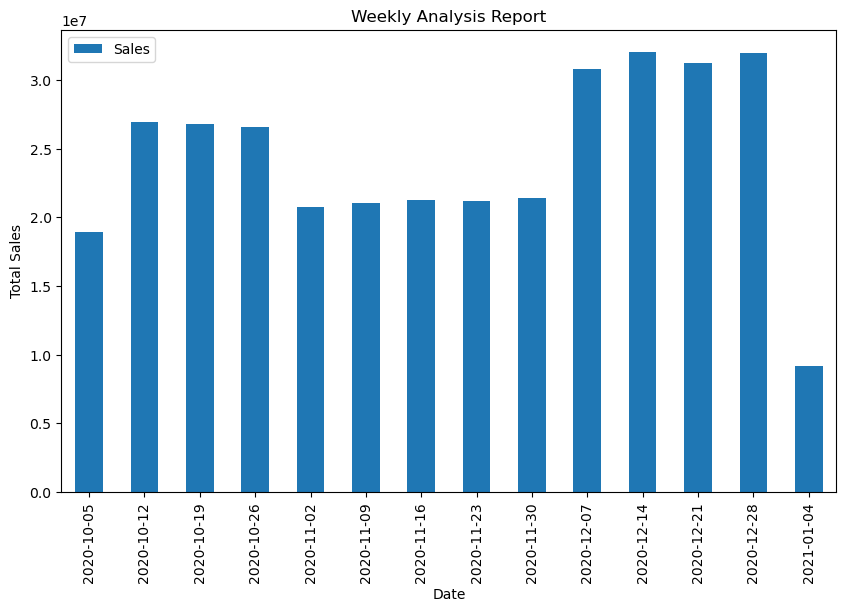

In [548]:
weekly_report.plot(kind='bar',x='Date', y='Sales',stacked=True,figsize=(10,6))
plt.title('Weekly Analysis Report')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

### Observation - Weekly Report

    Based on the weekly sale report, the highest total sale is 32060000 on '2020-12-14' and the lowest total sale is 9197500 on '2021-01-04'

### 4.2 Monthly Report

In [514]:
monthly_report = reports.resample('M').sum()
monthly_report

,Unit,Sales,Unit Normalization,SalesNormalization
Date,,,,
2020-10-31,45716,114290000,645.650794,645.650794
2020-11-30,36273,90682500,495.761905,495.761905
2020-12-31,54132,135330000,779.238095,779.238095


In [543]:
monthly_report_data = monthly_report['Sales']
monthly_report_data = pd.DataFrame(monthly_report_data)
monthly_report_data.reset_index(inplace=True)

# Assuming 'Date' column contains timestamps in your weekly_report DataFrame
# Convert 'Date' column to datetime
monthly_report_data['Date'] = pd.to_datetime(monthly_report_data['Date'])

# Extract only the date component from the timestamp
monthly_report_data['Date'] = monthly_report_data['Date'].dt.date
monthly_report_data

,Date,Sales
0,2020-10-31,114290000
1,2020-11-30,90682500
2,2020-12-31,135330000


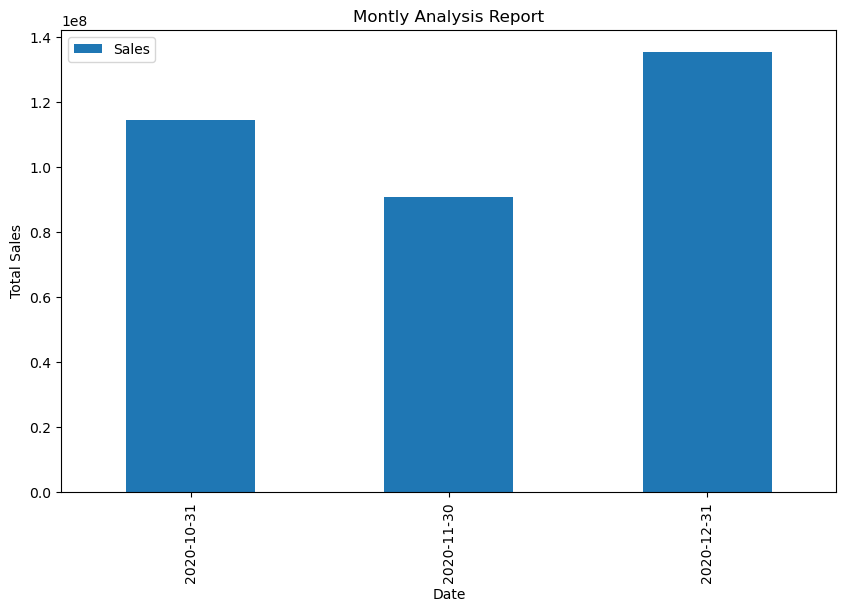

In [547]:
#Montly Analysis Graph for Sales
monthly_report_data.plot(kind='bar',x='Date', y='Sales', stacked=True,figsize=(10,6))
plt.title('Montly Analysis Report')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

### Observation - Monthly Report

    Based on the monthly analysis, the maximum total sale occured on the month of December, 2020 and the total sale amount  is 135330000. The minimum total sale occured on the month of October, 2020 and the total sale is 90682500.

### 4.3 Quarterly Report

In [517]:
quarterly_report = reports.resample('Q').sum()
quarterly_report

,Unit,Sales,Unit Normalization,SalesNormalization
Date,,,,
2020-12-31,136121,340302500,1920.650794,1920.650794


### Observation - Quarterly Report

Based on the quarterly analysis, the total sales for the Quarter (October, November and December) is 340302500. 

### 5. Summary

    The Exploratory data analysis is done on Sales dataset for AAL clothing buisness. The processes like checking for duplicate values, missing values, and unnecessay datas are done. Certain insights are,
        
        1. For expansion opportunities of AAL, the highest sale occured in VIC and lowest sales occured in WA state. Based on these observations, the sales in VIC can be focused by opening new stores or some other options. Similarly, sales programs for WA state can be developed to increase the sales. 
        2. When analyzing the sales details it is observed that the total sale is more in the month of December, 2020 and lowest sales is observed in the month of November, 2020.
        
        Furthermore, the dataset can also be analyzed with many other analysis and other ML model can also be applied. This is done as part of my learning process. Tq